In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import rho_plus as rp

theme, cs = rp.mpl_setup(False)

plt.rcParams['xtick.labelcolor'] = '#1d1d1d'
plt.rcParams['ytick.labelcolor'] = '#1d1d1d'
plt.rcParams['font.family'] = 'SF Pro Display'

In [2]:
data = pd.read_feather('mpc_full_feats_scaled_split.feather')
data

,comp,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,minimum Number,maximum Number,range Number,...,infoY_delta_e,statY_bandgap,infoY_bandgap,Rsplt1,Rsplt2,Rsplt3,Rsplt4,Rsplt5,piezo,dataset_split
0,In1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,2.864847,0.010989,-1.760193,...,False,False,False,False,False,False,False,False,False,1
1,Mg1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,-0.041846,-1.664706,-1.760193,...,False,False,False,False,True,False,False,True,False,0
2,Be1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,-0.670320,-2.027018,-1.760193,...,False,False,False,False,False,False,False,False,False,2
3,Hf1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,4.671710,1.052637,-1.760193,...,False,False,False,False,False,False,False,False,False,1
4,P1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,0.193832,-1.528839,-1.760193,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84185,Sb2W1O6,-0.302404,0.587564,0.680144,0.747711,0.764994,0.771629,-0.356083,1.143215,1.446811,...,False,False,False,False,False,False,False,False,True,0
84186,Sr1Hf1O3,-0.302404,-0.032556,0.033257,0.130844,0.170592,0.193219,-0.356083,1.052637,1.349629,...,False,False,False,False,False,False,False,False,True,1
84187,Rb1Ta1O3,-0.302404,-0.032556,0.033257,0.130844,0.170592,0.193219,-0.356083,1.097926,1.398220,...,False,False,False,False,False,False,False,False,True,1
84188,Ba1Ni1O3,-0.302404,-0.032556,0.033257,0.130844,0.170592,0.193219,-0.356083,0.328012,0.572174,...,False,False,False,False,False,False,False,False,True,0


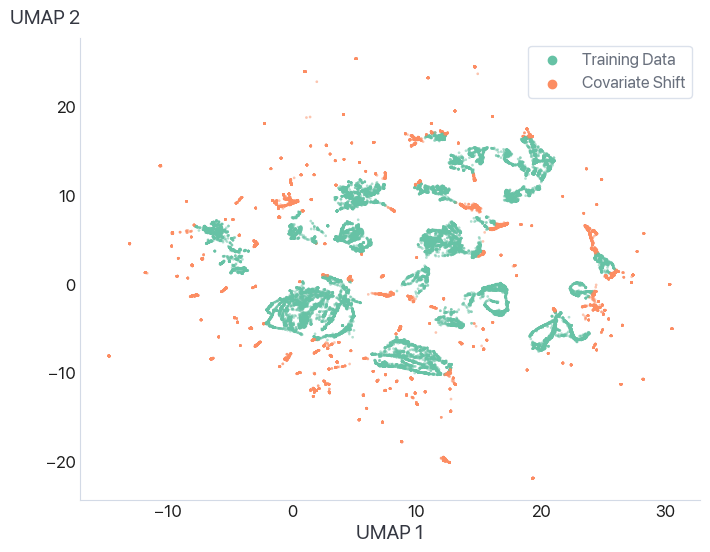

In [3]:
data['Dataset'] = ['Covariate Shift' if x else 'Training Data' for x in data['Xshift_umap']]
test_sets = data.select_dtypes(bool)
data['num_test_sets'] = data[test_sets].sum(axis=1)
data['training'] = data['num_test_sets'] == 0
ax = sns.scatterplot(data.query('training or Xshift_umap'), x='umap_x', y='umap_y', hue='Dataset', ec=None, s=3,
                     legend=False, alpha=0.5, palette='Set2', hue_order=['Training Data', 'Covariate Shift'])

c1, c2 = sns.color_palette('Set2', 2)
plt.scatter([], [], color=c1, label='Training Data')
plt.scatter([], [], color=c2, label='Covariate Shift')
plt.legend()
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
rp.ylabel_top()
plt.savefig('figs/umap_dist.png')

/tmp/ipykernel_370634/1700105556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ydata['Dataset'] = np.where(ydata['infoY_delta_e'], 'Prior Shift', 'Training')
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` 

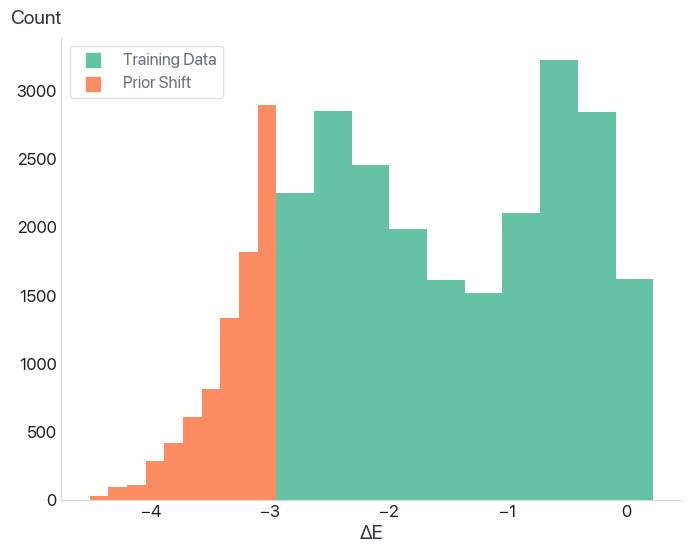

In [5]:
ydata = data.query('training or infoY_delta_e')
ydata['Dataset'] = np.where(ydata['infoY_delta_e'], 'Prior Shift', 'Training')

bins = np.hstack([
    np.histogram_bin_edges(ydata.query('infoY_delta_e')['delta_e']),
    np.histogram_bin_edges(ydata.query('training')['delta_e'])
])
alpha = 1
sns.histplot(ydata, x='delta_e', hue='Dataset', bins=bins, palette='Set2', alpha=alpha, ec='black')
plt.scatter([], [], color=c1, label='Training Data', marker='s', s=100, alpha=alpha)
plt.scatter([], [], color=c2, label='Prior Shift', marker='s', s=100, alpha=alpha)
plt.legend()
plt.xlabel('ΔE')
rp.ylabel_top()
plt.savefig('figs/prior_dist.png')

In [11]:
test_sets

,Xshift_tsne,Xshift_umap,statY_delta_e,infoY_delta_e,statY_bandgap,infoY_bandgap,Rsplt1,Rsplt2,Rsplt3,Rsplt4,Rsplt5,piezo
0,False,False,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,True,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
84185,False,False,False,False,False,False,False,False,False,False,False,True
84186,False,False,False,False,False,False,False,False,False,False,False,True
84187,False,False,False,False,False,False,False,False,False,False,False,True
84188,False,False,False,False,False,False,False,False,False,False,False,True


In [15]:
data.select_dtypes('number')

,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,minimum Number,maximum Number,range Number,mean Number,...,max ionic char,avg ionic char,magmom_pa,bandgap,delta_e,TSNE_x,TSNE_y,umap_x,umap_y,dataset_split
0,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,2.864847,0.010989,-1.760193,1.580818,...,-1.720739,-1.587831,-0.353321,0.0000,0.003319,-17.864090,-52.640877,-5.683136,6.433654,1
1,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,-0.041846,-1.664706,-1.760193,-0.789807,...,-1.720739,-1.587831,-0.353350,0.0000,0.039182,3.968115,65.517838,6.572012,15.989487,0
2,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,-0.670320,-2.027018,-1.760193,-1.302375,...,-1.720739,-1.587831,-0.353340,0.0000,0.108143,7.107537,-42.031658,18.698309,17.081478,2
3,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,4.671710,1.052637,-1.760193,3.054449,...,-1.720739,-1.587831,-0.353355,0.0000,0.071216,18.727713,-29.773060,21.015429,13.980207,1
4,-2.544139,4.304959,4.099305,3.846319,3.738150,3.663704,0.193832,-1.528839,-1.760193,-0.597594,...,-1.720739,-1.587831,1.805382,2.0113,3.509988,-16.820862,-46.939201,12.705784,-11.814580,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84185,-0.302404,0.587564,0.680144,0.747711,0.764994,0.771629,-0.356083,1.143215,1.446811,0.035996,...,-0.402975,-0.308863,-0.353175,1.5500,-1.977307,0.000000,0.000000,0.000000,0.000000,0
84186,-0.302404,-0.032556,0.033257,0.130844,0.170592,0.193219,-0.356083,1.052637,1.349629,0.158443,...,0.989041,1.397058,-0.353266,3.8500,-3.617353,0.000000,0.000000,0.000000,0.000000,1
84187,-0.302404,-0.032556,0.033257,0.130844,0.170592,0.193219,-0.356083,1.097926,1.398220,0.158443,...,1.100757,1.370412,-0.080313,0.0000,1.118394,0.000000,0.000000,0.000000,0.000000,1
84188,-0.302404,-0.032556,0.033257,0.130844,0.170592,0.193219,-0.356083,0.328012,0.572174,-0.174726,...,1.042201,1.080358,-0.352550,1.4710,-1.737571,0.000000,0.000000,0.000000,0.000000,0


In [80]:
from umap import UMAP
from umap.umap_ import nearest_neighbors

sup_data = data.query('dataset_split >= 0')
umap_Xy = sup_data.select_dtypes('number').drop(columns=['TSNE_x', 'TSNE_y', 'bandgap', 'magmom_pa', 'dataset_split'])
umap_X = umap_Xy.drop(columns=['delta_e'])
umap_y = umap_Xy['delta_e']

knn = nearest_neighbors(
    umap_X,
    n_neighbors=250,
    metric="manhattan",
    metric_kwds=None,
    angular=False,
    random_state=None,
)

In [81]:
umap = UMAP(n_neighbors=150, precomputed_knn=knn, min_dist=0.7)

sup_data[['sup_umap_x', 'sup_umap_y']] = umap.fit_transform(umap_X, y=umap_y)

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [84]:
sup_data.to_feather('umap_data.feather')

In [91]:
colors[0]

(0.4, 0.7607843137254902, 0.6470588235294118)

In [95]:
sns.choose_colorbrewer_palette('qualitative')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

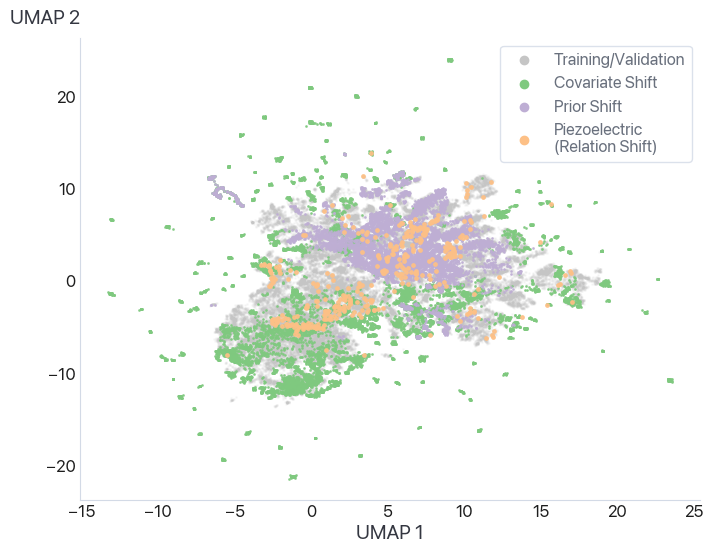

In [128]:
splits = {
    'Training/Validation': sup_data.query('training or Rsplt1 or Rsplt2 or Rsplt3 or Rsplt4 or Rsplt5'),
    'Covariate Shift': sup_data.query('Xshift_umap'),
    'Prior Shift': sup_data.query('infoY_delta_e'),
    'Piezoelectric\n(Relation Shift)': sup_data.query('piezo'),
}

split_kwargs = {
    'Training/Validation': {'alpha': 0.1},
    'Piezoelectric\n(Relation Shift)': {'s': 6, 'alpha': 0.9},
}

colors = ['#c5c5c5', *sns.color_palette('Accent', n_colors=len(splits))]

for (name, split), color in zip(splits.items(), colors):
    kwargs = {'s': 1, 'color': color, 'alpha': 0.8}
    kwargs.update(split_kwargs.get(name, {}))
    plt.scatter(split['sup_umap_x'], split['sup_umap_y'], **kwargs)
    plt.scatter([], [], color=color, label=name)

plt.legend()
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
rp.ylabel_top()
plt.savefig('figs/global_umap.png')

In [104]:
df = pd.read_csv('ablation.csv')
df = df.melt(id_vars=['type', 'epoch'], var_name='dataset', value_name='loss')

df['sal'] = df['type'].str.contains('Y info') | df['type'].str.contains('SAL')
df['type'] = df['type'].str.removeprefix('SAL ')
df['last'] = df['epoch'] == 'last'
df['ema'] = df['epoch'] == 'EMA'
fig_sets = {
    'train': 'Training',
    'piezo': "Piezoelectric\n(Relation Shift)",
    # 'Xshift_tsne': "X shift (TSNE)",
    'Xshift_umap': "Covariate Shift",
    # 'statY_delta_e': "Extreme ΔE\n(Prior Shift)",
    'infoY_delta_e': "Low ΔE\n(Prior Shift)",
    'statY_bandgap': "High-Bandgap\nMaterials",
    'rsplt_ave': 'Validation'
}
df['fig'] = df['dataset'].isin(fig_sets)
df['dataset'] = [fig_sets.get(x, x) for x in df['dataset']]
df['dataset_size'] = df['type'].str.extract(r'(\d+)x(\d+)').applymap(float).prod(axis=1)
df['type'] = df['type'].str.rstrip('1234567890x').str.removesuffix(' ')
df

/tmp/ipykernel_370634/1477999188.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['dataset_size'] = df['type'].str.extract(r'(\d+)x(\d+)').applymap(float).prod(axis=1)


,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size
0,Y info,354.0000,Training,0.1010,True,False,False,True,256.0
1,Y info,355.0000,Training,0.1080,True,False,False,True,256.0
2,Y info,356.0000,Training,0.0870,True,False,False,True,256.0
3,Y info,last,Training,0.0894,True,True,False,True,256.0
4,Y info,EMA,Training,0.0383,True,False,True,True,256.0
...,...,...,...,...,...,...,...,...,...
1270,Piezo2,last,Validation,0.1001,True,True,False,True,128.0
1271,Piezo2,EMA,Validation,0.1021,True,False,True,True,128.0
1272,New,341.0000,Validation,0.2055,True,False,False,True,1.0
1273,New,last,Validation,0.2014,True,True,False,True,1.0


['Covariate Shift', 'High-Bandgap\nMaterials', 'Low ΔE\n(Prior Shift)', 'Piezoelectric\n(Relation Shift)', 'Training', 'Validation']


/tmp/ipykernel_370634/752974913.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['theta'] = [col_x[c] for c in subs['dataset']]


,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,theta
710,baseline,EMA,Covariate Shift,0.0841,False,False,True,True,1.0,0.000000
965,baseline,EMA,High-Bandgap\nMaterials,0.1400,False,False,True,True,1.0,1.047198
880,baseline,EMA,Low ΔE\n(Prior Shift),0.1602,False,False,True,True,1.0,2.094395
1135,baseline,EMA,Piezoelectric\n(Relation Shift),0.0840,False,False,True,True,1.0,3.141593
30,baseline,EMA,Training,0.0012,False,False,True,True,1.0,4.188790
1220,baseline,EMA,Validation,0.0830,False,False,True,True,1.0,5.235988
710,baseline,EMA,Covariate Shift,0.0841,False,False,True,True,1.0,6.283185


,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,theta
726,SAL,EMA,Covariate Shift,0.2789,True,False,True,True,1.0,0.000000
981,SAL,EMA,High-Bandgap\nMaterials,0.0718,True,False,True,True,1.0,1.047198
896,SAL,EMA,Low ΔE\n(Prior Shift),0.0322,True,False,True,True,1.0,2.094395
1151,SAL,EMA,Piezoelectric\n(Relation Shift),0.2722,True,False,True,True,1.0,3.141593
46,SAL,EMA,Training,0.2811,True,False,True,True,1.0,4.188790
1236,SAL,EMA,Validation,0.2387,True,False,True,True,1.0,5.235988
726,SAL,EMA,Covariate Shift,0.2789,True,False,True,True,1.0,6.283185


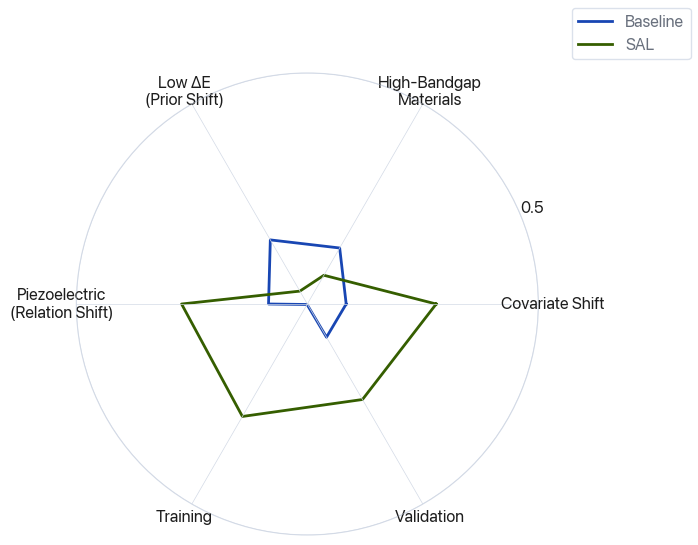

In [107]:
def radial_plot(subs):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    cols = sorted(pd.unique(subs['dataset']))
    print(cols)
    n_cols = len(cols)
    col_x = {ds: i * 2 * np.pi / n_cols for i, ds in enumerate(cols)}
    subs['theta'] = [col_x[c] for c in subs['dataset']]

    for sal_val, color, label in zip((False, True), cs, ('Baseline', 'SAL')):
        group = subs.query('sal == @sal_val').sort_values('theta')
        last_row = group.iloc[[0]].copy()
        last_row['theta'] += 2 * np.pi
        group = pd.concat([group, last_row], axis=0)
        display(group)
        ax.plot(group['theta'], group['loss'], label=label, color=color, zorder=2, lw=2)

    fig.legend()
    ticks = list(col_x.values())
    ticklabels = list(col_x.keys())
    ax.set_xticks(ticks=ticks, labels=ticklabels)
    ax.set_thetamax(360)
    return fig, ax

subs = df.query('(type == "baseline" or type == "SAL") and ema and fig')
fig, ax = radial_plot(subs)
ax.set_rticks([0.5])
ax.grid(lw=0.5)
fig.savefig('figs/radial_baseline.png')

/tmp/ipykernel_370634/1213502717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['CAL'] = np.where(subs['sal'], 'CAL', 'Baseline')
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

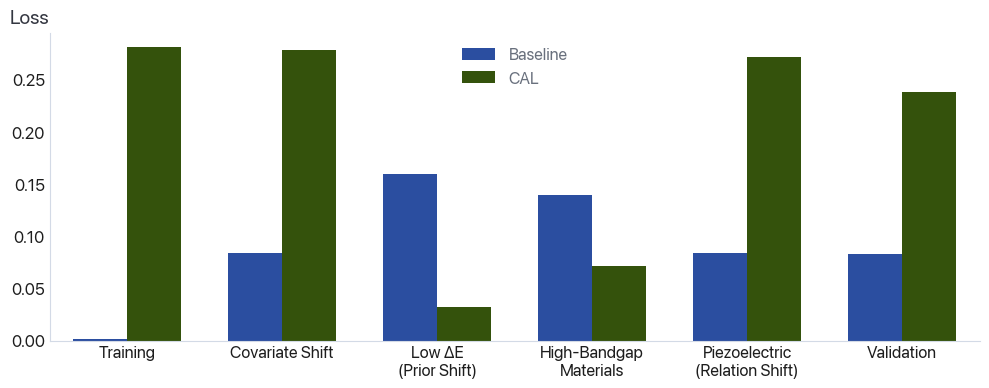

In [110]:
def normal_plot(subs):
    fig, ax = plt.subplots(figsize=(12, 4))
    subs['CAL'] = np.where(subs['sal'], 'CAL', 'Baseline')
    sns.barplot(subs, hue='CAL', x='dataset', y='loss', ax=ax, hue_order=['Baseline', 'CAL'], width=0.7)
    ax.set_xlabel('')
    ax.get_legend().set_title('')
    ax.get_legend().set_frame_on(False)
    ax.set_ylabel('Loss')
    rp.ylabel_top(ax)
    return fig, ax

fig, ax = normal_plot(subs)
fig.savefig('figs/normal_baseline.png')

In [111]:
df['post'] = df['type'].isin(('Y info', 'finetune'))
post = df.query('post')
post

,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,post
0,Y info,354.0000,Training,0.1010,True,False,False,True,256.0,True
1,Y info,355.0000,Training,0.1080,True,False,False,True,256.0,True
2,Y info,356.0000,Training,0.0870,True,False,False,True,256.0,True
3,Y info,last,Training,0.0894,True,True,False,True,256.0,True
4,Y info,EMA,Training,0.0383,True,False,True,True,256.0,True
...,...,...,...,...,...,...,...,...,...,...
1229,finetune,best_vaild_0.0055_66,Validation,0.0776,False,False,False,True,1024.0,True
1230,finetune,IR3_best_train_0.0003_100,Validation,0.0764,False,False,False,True,1024.0,True
1231,finetune,last,Validation,0.0759,False,True,False,True,1024.0,True
1232,finetune,best_vaild_0.0055_77,Validation,0.0774,False,False,False,True,1024.0,True


In [75]:
# sns.lineplot(post.query('fig and ema and dataset == "Low ΔE"'), hue='sal', x='dataset_size', y='loss')
# sns.lineplot(post.query('fig and last and dataset == "Low ΔE"'), hue='sal', x='dataset_size', y='loss')

,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,post
13,Y info,last,Training,0.0774,True,True,False,True,1024.0,True
41,finetune,last,Training,0.0006,False,True,False,True,1024.0,True
693,Y info,last,Covariate Shift,0.1827,True,True,False,True,1024.0,True
721,finetune,last,Covariate Shift,0.0917,False,True,False,True,1024.0,True
863,Y info,last,Low ΔE\n(Prior Shift),0.0268,True,True,False,True,1024.0,True
891,finetune,last,Low ΔE\n(Prior Shift),0.0059,False,True,False,True,1024.0,True
948,Y info,last,High-Bandgap\nMaterials,0.0422,True,True,False,True,1024.0,True
976,finetune,last,High-Bandgap\nMaterials,0.0234,False,True,False,True,1024.0,True
1118,Y info,last,Piezoelectric\n(Relation Shift),0.1186,True,True,False,True,1024.0,True
1146,finetune,last,Piezoelectric\n(Relation Shift),0.0878,False,True,False,True,1024.0,True


['Covariate Shift', 'High-Bandgap\nMaterials', 'Low ΔE\n(Prior Shift)', 'Piezoelectric\n(Relation Shift)', 'Training', 'Validation']


,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,post,theta
721,finetune,last,Covariate Shift,0.0917,False,True,False,True,1024.0,True,0.000000
976,finetune,last,High-Bandgap\nMaterials,0.0234,False,True,False,True,1024.0,True,1.047198
891,finetune,last,Low ΔE\n(Prior Shift),0.0059,False,True,False,True,1024.0,True,2.094395
1146,finetune,last,Piezoelectric\n(Relation Shift),0.0878,False,True,False,True,1024.0,True,3.141593
41,finetune,last,Training,0.0006,False,True,False,True,1024.0,True,4.188790
1231,finetune,last,Validation,0.0759,False,True,False,True,1024.0,True,5.235988
721,finetune,last,Covariate Shift,0.0917,False,True,False,True,1024.0,True,6.283185


,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,post,theta
693,Y info,last,Covariate Shift,0.1827,True,True,False,True,1024.0,True,0.000000
948,Y info,last,High-Bandgap\nMaterials,0.0422,True,True,False,True,1024.0,True,1.047198
863,Y info,last,Low ΔE\n(Prior Shift),0.0268,True,True,False,True,1024.0,True,2.094395
1118,Y info,last,Piezoelectric\n(Relation Shift),0.1186,True,True,False,True,1024.0,True,3.141593
13,Y info,last,Training,0.0774,True,True,False,True,1024.0,True,4.188790
1203,Y info,last,Validation,0.1436,True,True,False,True,1024.0,True,5.235988
693,Y info,last,Covariate Shift,0.1827,True,True,False,True,1024.0,True,6.283185


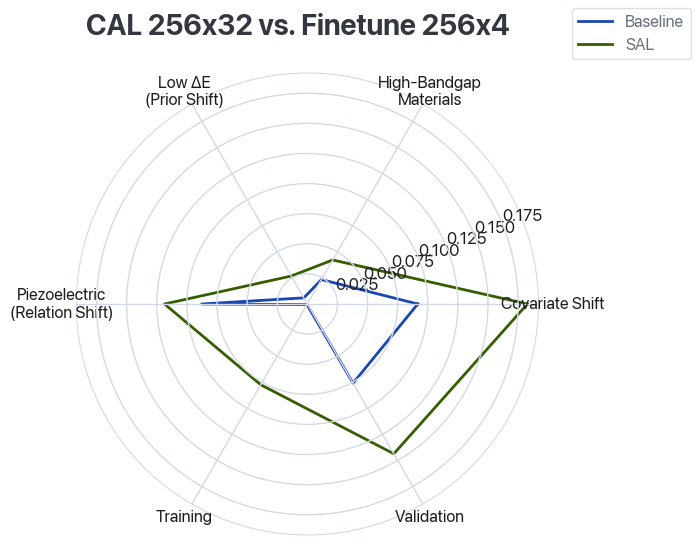

In [112]:
last_best = post.query('fig and last')
last_best = last_best.query('(type == "finetune" and dataset_size == 1024) or (type == "Y info" and dataset_size == 1024)')
display(last_best)
fig, ax = radial_plot(last_best)
fig.suptitle('CAL 256x32 vs. Finetune 256x4')
fig.savefig('figs/radial_infoy_last.png')

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


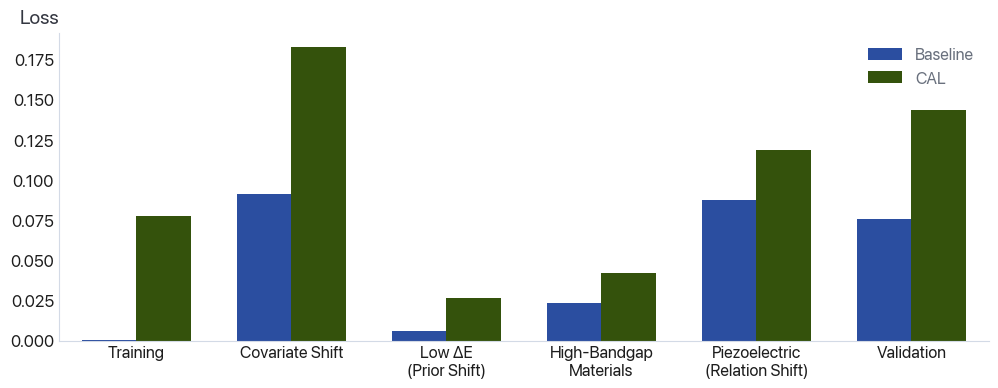

In [113]:
fig, ax = normal_plot(last_best)
# fig.suptitle('SAL 256x32 vs. Finetune 256x4')
fig.savefig('figs/normal_infoy_last.png')

In [114]:
piezo = df[df['type'].str.contains('Piezo')]
piezo

,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,post
47,Piezo,220.0000,Training,0.0469,True,False,False,True,1.0,False
48,Piezo,221.0000,Training,0.0295,True,False,False,True,1.0,False
49,Piezo,last,Training,0.0320,True,True,False,True,1.0,False
50,Piezo,EMA,Training,0.0249,True,False,True,True,1.0,False
51,Finetune Piezo,EMA,Training,0.0725,False,False,True,True,128.0,False
...,...,...,...,...,...,...,...,...,...,...
1267,Piezo2,EMA,Validation,0.0985,True,False,True,True,256.0,False
1268,Piezo2,370.0000,Validation,0.1194,True,False,False,True,128.0,False
1269,Piezo2,371.0000,Validation,0.1210,True,False,False,True,128.0,False
1270,Piezo2,last,Validation,0.1001,True,True,False,True,128.0,False


In [115]:
df.query('dataset == "Piezoelectric" and type == "SAL"')

,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,post


In [116]:
baseline = pd.read_feather('exps/')

IsADirectoryError: [Errno 21] Is a directory: 'exps/'

In [ ]:
piezo['dataset'].unique()

array(['Training', 'Partial_train', 'Rsplt1', 'Rsplt2', 'Rsplt3',
       'Rsplt4', 'Rsplt5', 'Xshift_tsne', 'Covariate Shift',
       'statY_delta_e', 'Low ΔE\n(Prior Shift)',
       'High-Bandgap\nMaterials', 'infoY_bandgap',
       'Piezoelectric\n(Relation Shift)', 'Validation'], dtype=object)

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


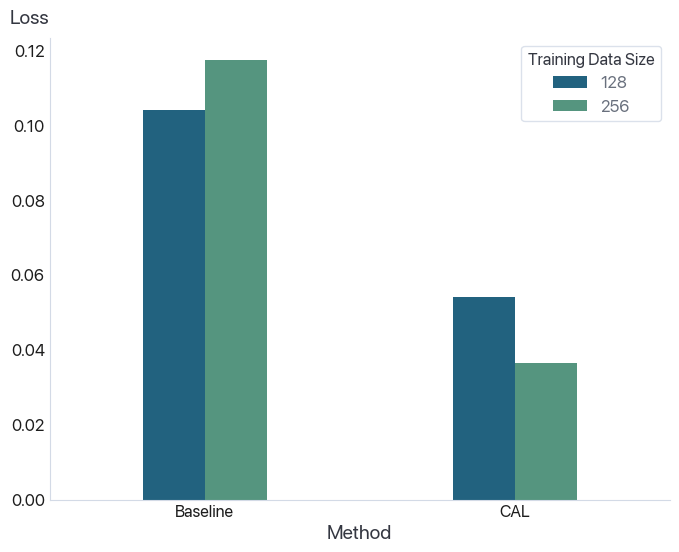

In [120]:
fig, ax = plt.subplots()
piezo_fig = piezo[piezo['dataset'] == "Piezoelectric\n(Relation Shift)"].query('dataset_size > 1 and ema')
piezo_fig['Training Data Size'] = piezo_fig['dataset_size'].map(lambda x: f'{x:.0f}')
sns.barplot(piezo_fig, hue='Training Data Size', x='sal', y='loss', legend=True, ax=ax, width=0.4, palette='rho_viridia')
# ax.set_xticks(ax.get_xticks(), labels=['128', '256'])
ax.set_xticks(ax.get_xticks(), labels=['Baseline', 'CAL'])
# ax.set_title('Piezoelectric Fine-tuning Performance')
ax.set_xlabel('Method')
ax.set_ylabel('Loss')
rp.ylabel_top()
fig.legend
fig.savefig('figs/piezo.png')

In [121]:
pdf = pd.read_feather('exps/delta_e_piezo_2/SAL-training_loss.feather')
pdf

,epoch,Train,Partial_train,Rsplt1,Rsplt2,Rsplt3,Rsplt4,Rsplt5,Xshift_tsne,Xshift_umap,statY_delta_e,infoY_delta_e,statY_bandgap,infoY_bandgap,piezo,rsplt_ave,Partial
0,1,0.034715,0.164271,0.102765,0.102031,0.106452,0.108030,0.106872,0.092764,0.123653,0.691778,0.140333,0.156589,0.113302,0.076228,0.105230,NaN
1,2,0.028391,0.050317,0.097718,0.097023,0.101424,0.103113,0.101577,0.088762,0.118496,0.687930,0.135183,0.146572,0.104617,0.069712,0.100171,NaN
2,3,0.026510,0.038649,0.095945,0.095165,0.099448,0.101209,0.099720,0.086470,0.115253,0.684378,0.135769,0.147040,0.104634,0.066970,0.098297,NaN
3,4,0.025408,0.034084,0.094484,0.093560,0.097961,0.099736,0.098228,0.083687,0.112614,0.681039,0.129008,0.138776,0.098714,0.063788,0.096794,NaN
4,5,0.058007,0.194969,0.140352,0.137347,0.145336,0.145452,0.144588,0.166109,0.167949,0.685957,0.264363,0.447714,0.317613,0.039905,0.142615,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,215,0.031007,0.052083,0.109190,0.106569,0.112818,0.114197,0.114178,0.115088,0.136282,0.675602,0.219320,0.305395,0.216091,0.036289,0.111390,NaN
215,216,0.039033,0.048609,0.113077,0.111300,0.117011,0.117136,0.118751,0.122645,0.141093,0.637092,0.235291,0.325209,0.232565,0.037022,0.115455,NaN
216,217,0.025309,0.143991,0.105122,0.103003,0.108424,0.110145,0.109189,0.099944,0.123529,0.702161,0.184028,0.213299,0.157823,0.033452,0.107177,NaN
217,218,0.045642,0.063121,0.130908,0.128928,0.133781,0.137211,0.135112,0.121632,0.170137,0.791748,0.154929,0.150374,0.118313,0.033975,0.133188,NaN


In [122]:
piezo_tab = df[df['type'].str.contains('iezo') | df['type'].str.contains('ase')].query('ema')
piezo_tab.pivot_table(index='dataset', columns=['type', 'dataset_size'], values='loss').round(4)

type                            Finetune Piezo           Piezo  Piezo2  \
dataset_size                             128.0   256.0   1.0     128.0   
dataset                                                                  
Covariate Shift                         0.0893  0.0900  0.1185  0.1111   
High-Bandgap\nMaterials                 0.0611  0.0507  0.2152  0.2280   
Low ΔE\n(Prior Shift)                   0.0565  0.0442  0.1881  0.2124   
Piezoelectric\n(Relation Shift)         0.1042  0.1176  0.0573  0.0542   
Rsplt1                                  0.0810  0.0811  0.0999  0.0999   
Rsplt2                                  0.0802  0.0804  0.0991  0.0986   
Rsplt3                                  0.0853  0.0855  0.1035  0.1037   
Rsplt4                                  0.0863  0.0865  0.1044  0.1043   
Rsplt5                                  0.0838  0.0839  0.1041  0.1043   
Training                                0.0725  0.0815  0.0249  0.0236   
Validation                              0.0833     NaN  0.1022  0.1021   
Xshift_tsne                             0.0628  0.0627  0.0939  0.0915   
infoY_bandgap                           0.0467  0.0396  0.1496  0.1634   
statY_delta_e                           0.5921  0.5797  0.6976  0.6858   

type                                    baseline  
dataset_size                      256.0    1.0    
dataset                                           
Covariate Shift                  0.1143   0.0841  
High-Bandgap\nMaterials          0.1688   0.1400  
Low ΔE\n(Prior Shift)            0.1680   0.1602  
Piezoelectric\n(Relation Shift)  0.0365   0.0840  
Rsplt1                           0.0963   0.0806  
Rsplt2                           0.0950   0.0800  
Rsplt3                           0.1000   0.0850  
Rsplt4                           0.1012   0.0854  
Rsplt5                           0.1003   0.0840  
Training                         0.0186   0.0012  
Validation                       0.0985   0.0830  
Xshift_tsne                      0.0905   0.0605  
infoY_bandgap                    0.1241   0.1059  
statY_delta_e                    0.7043   0.6718

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


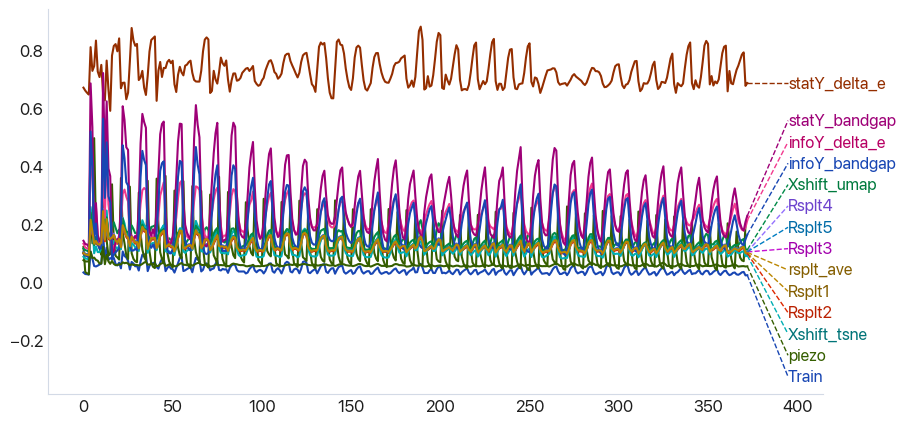

In [123]:
pdf = pd.read_feather('exps/delta_e_piezo_3_long/SAL-training_loss.feather')
pdf.sort_values('epoch')

fig, ax = plt.subplots(figsize=(10, 5))
pdf.drop(columns=['epoch']).plot(ax=ax)
rp.line_labels()

dataset,Rsplt1,Rsplt2,Rsplt3,Rsplt4,Rsplt5,Xshift_tsne,Xshift_umap,infoY_bandgap,infoY_delta_e,piezo,statY_bandgap,statY_delta_e
output,-1.412722,-1.418012,-1.409161,-1.388913,-1.399050,-1.575561,-1.090978,-2.056470,-2.716198,-1.633095,-2.029848,-1.500480
target,-1.480051,-1.485498,-1.470971,-1.445060,-1.466887,-1.691499,-1.120132,-2.518289,-3.298072,-1.726399,-2.602811,-1.127669
loss,0.099852,0.098586,0.103670,0.104276,0.104255,0.091496,0.111088,0.163360,0.212435,0.054227,0.227955,0.685746


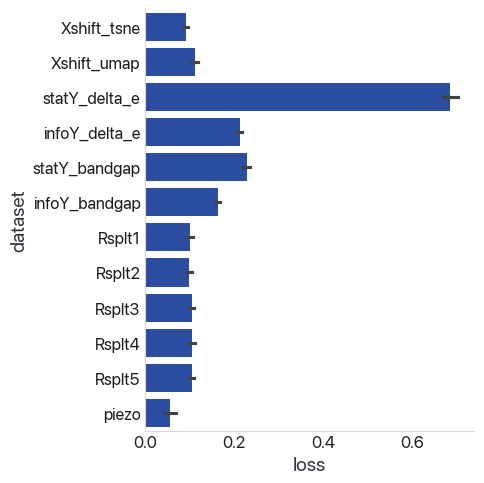

In [124]:
resdf = pd.read_feather('exps/delta_e_piezo_3_long/results_ema.feather')
display(resdf.groupby('dataset').mean().T)
sns.catplot(resdf, y='dataset', x='loss', kind='bar')

dataset,Rsplt1,Rsplt2,Rsplt3,Rsplt4,Rsplt5,Xshift_tsne,Xshift_umap,infoY_bandgap,infoY_delta_e,piezo,statY_bandgap,statY_delta_e
output,-1.425150,-1.429386,-1.421442,-1.401112,-1.411394,-1.597395,-1.115205,-2.062335,-2.724597,-1.640258,-2.038497,-1.500387
target,-1.480051,-1.485498,-1.470971,-1.445060,-1.466887,-1.691499,-1.120132,-2.518289,-3.298072,-1.726399,-2.602811,-1.127669
loss,0.097760,0.096720,0.101364,0.102384,0.102030,0.088498,0.108591,0.161201,0.210865,0.054653,0.224037,0.688352


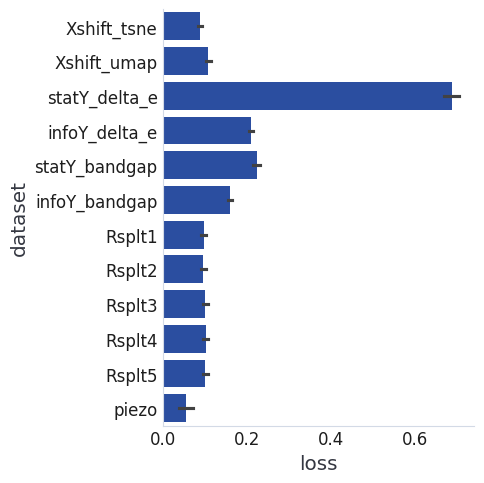

In [ ]:
resdf = pd.read_feather('exps/delta_e_piezo_3_weighted/results_ema.feather')
display(resdf.groupby('dataset').mean().T)
sns.catplot(resdf, y='dataset', x='loss', kind='bar')

In [ ]:
resdf.query('dataset == "piezo"').shape

(126, 4)

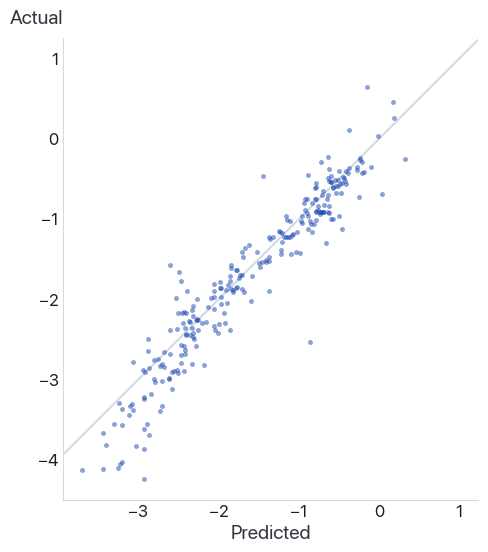

In [125]:
plt.gca().set_aspect('equal', adjustable='box')
plt.axline((0, 0), (1, 1), c=plt.rcParams['axes.edgecolor'], zorder=-99)
sns.scatterplot(resdf.query('dataset == "piezo"'), x='output', y='target', ec=None, s=10, alpha=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Predicted Formation Energy (Piezo)')
rp.ylabel_top()
plt.savefig('figs/piezo_scatter.png')

/tmp/ipykernel_370634/1213502717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['CAL'] = np.where(subs['sal'], 'CAL', 'Baseline')
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

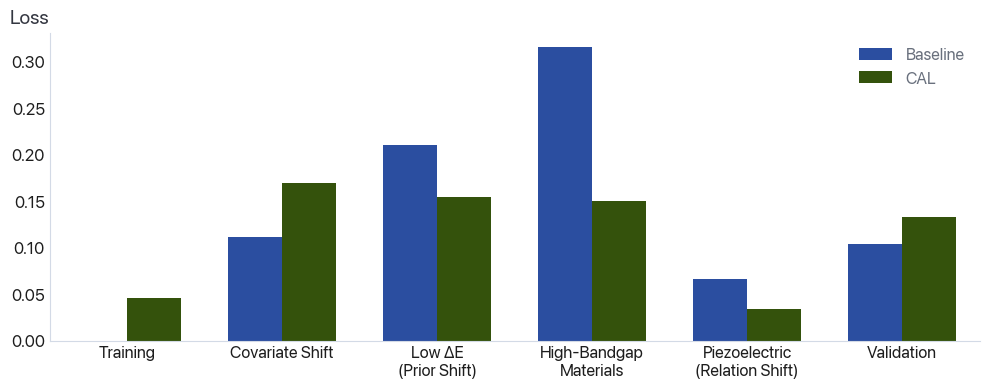

In [126]:
fig, ax = normal_plot(piezo.query('fig and last and ((not sal and dataset_size == 128) or (sal and dataset_size == 256))'))
# ax.set_title('Piezoelectric Fine-Tuning')
fig.savefig('figs/normal_piezo.png')

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


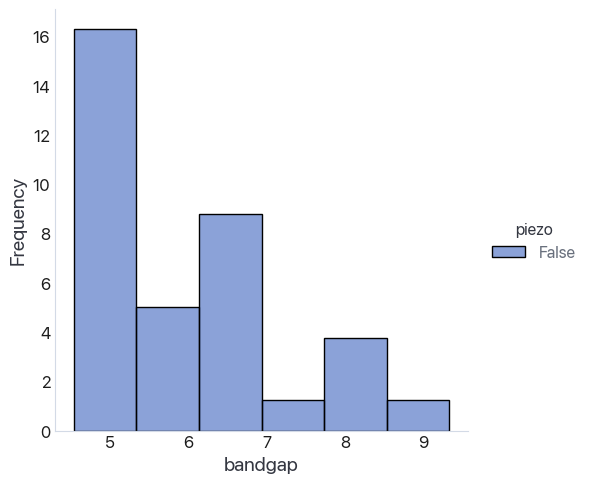

In [127]:
sns.displot(data.query('dataset_split == 7 and statY_bandgap'), x='bandgap', hue='piezo', stat='frequency')

In [ ]:
from pathlib import Path

results = {}
for feather in Path('exps/results').glob('*.feather'):
    results[feather.name] = pd.read_feather(feather)

{k: len(v.index) for k, v in results.items()}

{'delta_e_03-04-14-14.feather': 126,
 'delta_e_Yinfo_256x2.feather': 143,
 'delta_e_piezo_128_early_stop.feather': 61,
 'delta_e_statY.feather': 454,
 'delta_e_Yinfo_256x16.feather': 328,
 'delta_e_Xumap.feather': 381,
 'delta_e_Xtsne.feather': 175,
 'delta_e_baseline.feather': 103,
 'delta_e_Yinfo_256x1.feather': 358,
 'delta_e_Yinfo_256x8_no_space.feather': 245,
 'delta_e_Xumap_256x4.feather': 501,
 'delta_e_piezo_128.feather': 223,
 'delta_e_Yinfo_256x4.feather': 133,
 'delta_e_Yinfo_256x32.feather': 138,
 'delta_e_Yinfo_256x8.feather': 420,
 'delta_e_Xtsne_256x4.feather': 265}

In [ ]:
!ls exps/

delta_e_02-04-15-04/             delta_e_02-26-21-19/
delta_e_02-04-long/              delta_e_02-26-21-31/
delta_e_02-05-13-23/             delta_e_02-26-21-43/
delta_e_02-05-13-25/             delta_e_02-26-22-21/
delta_e_02-05-better-hopefully/  delta_e_02-26-23-03/
delta_e_02-12-13-31/             delta_e_02-27-10-31/
delta_e_02-12-13-42/             delta_e_02-27-11-29/
delta_e_02-12-13-45/             delta_e_02-27-12-11/
delta_e_02-12-13-46/             delta_e_02-27-16-46/
delta_e_02-12-13-50/             delta_e_02-27-18-16/
delta_e_02-12-13-51/             delta_e_04-22-10-51/
delta_e_02-19-13-22/             delta_e_04-22-11-28/
delta_e_02-19-13-30/             delta_e_04-22-11-29/
delta_e_02-19-13-31/             delta_e_04-22-11-30/
delta_e_02-19-13-33/             delta_e_04-22-11-31/
delta_e_02-19-13-35/             delta_e_04-22-11-32/
delta_e_02-19-13-42/             delta_e_04-22-11-44/
delta_e_02-19-13-46/             delta_e_04-22-12-41/
delta_e_02-19-13-47/        

/home/nicholas/anaconda3/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [ ]:
infoy = pd.read_feather('exps/results/delta_e_Yinfo_256x1.feather')
infoy.sort_values('Partial_train').head(30)

,epoch,Train,Partial_train,Rsplt1,Rsplt2,Rsplt3,Rsplt4,Rsplt5,Xshift_tsne,Xshift_umap,statY_delta_e,infoY_delta_e,statY_bandgap,infoY_bandgap,piezo,rsplt_ave,Partial
9,10,0.019338,0.028355,0.089003,0.088098,0.092461,0.093719,0.092862,0.077333,0.102939,0.668191,0.147015,0.157235,0.110054,0.079661,0.091229,NaN
8,9,0.019559,0.029924,0.089048,0.088229,0.092531,0.093775,0.092964,0.076226,0.102460,0.668196,0.142671,0.151888,0.106893,0.079590,0.091310,NaN
6,7,0.020893,0.030370,0.088808,0.087993,0.092328,0.093600,0.092536,0.075736,0.102512,0.659472,0.135045,0.146449,0.103476,0.079293,0.091053,NaN
5,6,0.021386,0.031966,0.090729,0.089819,0.094269,0.095504,0.094426,0.079729,0.106331,0.666584,0.144477,0.158723,0.112111,0.081085,0.092949,NaN
7,8,0.020615,0.032179,0.089756,0.088755,0.093153,0.094428,0.093606,0.077679,0.104107,0.667467,0.141639,0.153282,0.107309,0.081211,0.091940,NaN
3,4,0.023509,0.032999,0.092877,0.091906,0.096152,0.097707,0.096608,0.082096,0.110581,0.672042,0.144292,0.159091,0.112420,0.081929,0.095050,NaN
4,5,0.022401,0.033463,0.091077,0.090279,0.094651,0.095972,0.094789,0.078424,0.106094,0.665299,0.140354,0.154651,0.109623,0.082663,0.093354,NaN
2,3,0.024914,0.036673,0.095132,0.094308,0.098405,0.100017,0.098910,0.084381,0.112927,0.681693,0.149679,0.160538,0.114636,0.084525,0.097354,NaN
63,64,0.083351,0.045463,0.148067,0.147690,0.152733,0.155860,0.151612,0.123420,0.180097,0.764543,0.029809,0.056272,0.048497,0.123731,0.151192,NaN
1,2,0.026953,0.049022,0.097327,0.096447,0.100698,0.102158,0.101192,0.088895,0.117874,0.683448,0.157137,0.173193,0.122552,0.086763,0.099565,NaN


In [ ]:
infoy = pd.read_feather('exps/results/delta_e_Yinfo_256x1.feather')
infoy.sort_values('Partial_train').head(30)

,epoch,Train,Partial_train,Rsplt1,Rsplt2,Rsplt3,Rsplt4,Rsplt5,Xshift_tsne,Xshift_umap,statY_delta_e,infoY_delta_e,statY_bandgap,infoY_bandgap,piezo,rsplt_ave,Partial
9,10,0.019338,0.028355,0.089003,0.088098,0.092461,0.093719,0.092862,0.077333,0.102939,0.668191,0.147015,0.157235,0.110054,0.079661,0.091229,NaN
8,9,0.019559,0.029924,0.089048,0.088229,0.092531,0.093775,0.092964,0.076226,0.102460,0.668196,0.142671,0.151888,0.106893,0.079590,0.091310,NaN
6,7,0.020893,0.030370,0.088808,0.087993,0.092328,0.093600,0.092536,0.075736,0.102512,0.659472,0.135045,0.146449,0.103476,0.079293,0.091053,NaN
5,6,0.021386,0.031966,0.090729,0.089819,0.094269,0.095504,0.094426,0.079729,0.106331,0.666584,0.144477,0.158723,0.112111,0.081085,0.092949,NaN
7,8,0.020615,0.032179,0.089756,0.088755,0.093153,0.094428,0.093606,0.077679,0.104107,0.667467,0.141639,0.153282,0.107309,0.081211,0.091940,NaN
3,4,0.023509,0.032999,0.092877,0.091906,0.096152,0.097707,0.096608,0.082096,0.110581,0.672042,0.144292,0.159091,0.112420,0.081929,0.095050,NaN
4,5,0.022401,0.033463,0.091077,0.090279,0.094651,0.095972,0.094789,0.078424,0.106094,0.665299,0.140354,0.154651,0.109623,0.082663,0.093354,NaN
2,3,0.024914,0.036673,0.095132,0.094308,0.098405,0.100017,0.098910,0.084381,0.112927,0.681693,0.149679,0.160538,0.114636,0.084525,0.097354,NaN
63,64,0.083351,0.045463,0.148067,0.147690,0.152733,0.155860,0.151612,0.123420,0.180097,0.764543,0.029809,0.056272,0.048497,0.123731,0.151192,NaN
1,2,0.026953,0.049022,0.097327,0.096447,0.100698,0.102158,0.101192,0.088895,0.117874,0.683448,0.157137,0.173193,0.122552,0.086763,0.099565,NaN


In [ ]:
infoy = pd.read_feather('exps/results/delta_e_Yinfo_256x4.feather')
# infoy.sort_values('infoY_delta_e')
infoy.sort_values('infoY_delta_e')

,epoch,Train,Partial_train,Rsplt1,Rsplt2,Rsplt3,Rsplt4,Rsplt5,Xshift_tsne,Xshift_umap,statY_delta_e,infoY_delta_e,statY_bandgap,infoY_bandgap,piezo,rsplt_ave,Partial
130,131,0.066547,0.291107,0.122730,0.122328,0.126922,0.128265,0.126783,0.103166,0.160659,0.635234,0.009238,0.038341,0.035387,0.116303,0.125406,NaN
122,123,0.169280,0.165610,0.166083,0.167275,0.168559,0.169025,0.171080,0.107934,0.169192,0.342136,0.009707,0.059803,0.058084,0.166390,0.168405,NaN
124,125,0.183485,0.372238,0.238322,0.238215,0.243165,0.246120,0.243368,0.181285,0.302468,0.893450,0.009868,0.037637,0.035312,0.200515,0.241838,NaN
118,119,0.057609,0.229279,0.103580,0.104149,0.108462,0.108969,0.107785,0.083132,0.125254,0.538548,0.010148,0.035635,0.035590,0.115702,0.106589,NaN
128,129,0.125574,0.157051,0.137030,0.139592,0.140680,0.141968,0.142679,0.091895,0.150541,0.380342,0.010227,0.047446,0.044243,0.138467,0.140390,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,10,0.019338,0.028355,0.089003,0.088098,0.092461,0.093719,0.092862,0.077333,0.102939,0.668191,0.147543,0.157235,0.110054,0.079661,0.091229,NaN
2,3,0.024914,0.036673,0.095132,0.094308,0.098405,0.100017,0.098910,0.084381,0.112927,0.681693,0.150096,0.160538,0.114636,0.084525,0.097354,NaN
0,1,0.033386,0.163024,0.102248,0.101634,0.105700,0.107317,0.106440,0.093665,0.123803,0.688389,0.157388,0.174223,0.124866,0.090929,0.104668,NaN
1,2,0.026953,0.049022,0.097327,0.096447,0.100698,0.102158,0.101192,0.088895,0.117874,0.683448,0.157738,0.173193,0.122552,0.086763,0.099565,NaN


In [ ]:
staty = df[df['type'].str.contains('statY', case=False)]
staty

,type,epoch,dataset,loss,sal,last,ema,fig,dataset_size,post
59,StatY,451.0000,Training,0.0993,True,False,False,True,256.0,False
60,StatY,452.0000,Training,0.0596,True,False,False,True,256.0,False
61,StatY,last,Training,0.0757,True,True,False,True,256.0,False
62,StatY,EMA,Training,0.0740,True,False,True,True,256.0,False
63,statY,224.0000,Training,0.1475,True,False,False,True,1024.0,False
...,...,...,...,...,...,...,...,...,...,...
1259,Finetune statY,last,Validation,0.2707,False,True,False,True,256.0,False
1260,Finetune statY,EMA,Validation,0.0934,False,False,True,True,1024.0,False
1261,Finetune statY,best_vaild,Validation,0.2904,False,False,False,True,1024.0,False
1262,Finetune statY,IR3_best_train,Validation,0.2781,False,False,False,True,1024.0,False


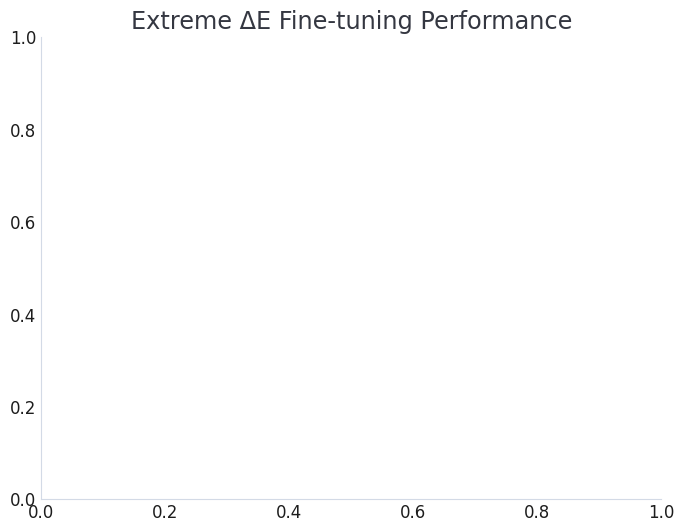

In [ ]:
fig, ax = plt.subplots()
sns.barplot(staty.query('dataset == "Extreme ΔE" and last'), hue='sal', x='dataset_size', y='loss', legend=True, ax=ax)
ax.set_title('Extreme ΔE Fine-tuning Performance')
fig.savefig('figs/staty.png')

/tmp/ipykernel_1876914/2707084003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['SAL'] = np.where(subs['sal'], 'SAL', 'Baseline')


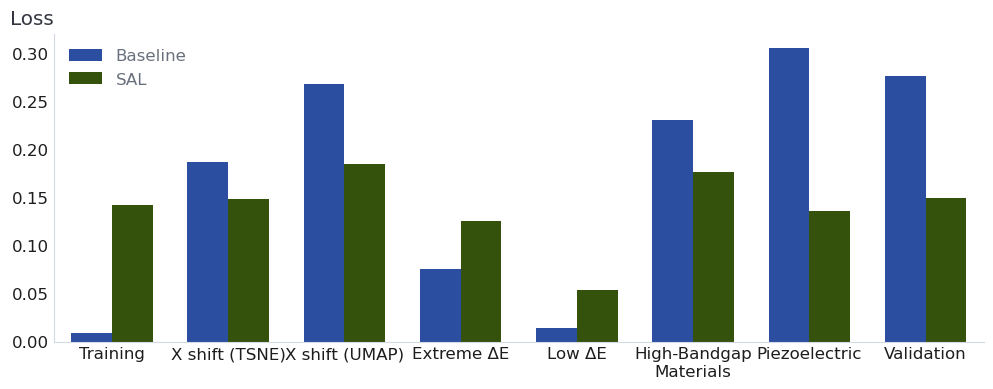

In [ ]:
fig, ax = normal_plot(staty.query('fig and last and dataset_size != 256'))
# ax.set_title('Extreme ΔE Fine-Tuning')
fig.savefig('figs/normal_staty.png')

In [ ]:

from pathlib import Path

from tomllib import load

res = []

for fn in Path('exps/results').glob('*.feather'):
    if 'early_stop' in fn.name:
        continue
    toml_fn = fn.with_suffix('.toml')
    with open(toml_fn, 'rb') as toml_f:
        toml = load(toml_f)
        res_df = pd.read_feather(fn)
        res_df['exp_id'] = fn.stem
        res_df['exp'] = toml['log']['exp_name']
        res_df['adv_data'] = toml.get('adv_train_data', 'Baseline')
        res_df['batch_size'] = toml['data']['batch_size']
        res_df['batch_num'] = toml['data']['num_sal_samples'] // res_df['batch_size']
        res_df['total_size'] = toml['data']['num_sal_samples']
        res_df['target'] = toml['target']['col_name']
        res_df['ema'] = pd.isna(res_df['Partial_train'])
        res.append(res_df)


res = pd.concat(res)

In [ ]:
res

,epoch,Train,Partial_train,Rsplt1,Rsplt2,Rsplt3,Rsplt4,Rsplt5,Xshift_tsne,Xshift_umap,...,rsplt_ave,Partial,exp_id,exp,adv_data,batch_size,batch_num,total_size,target,ema
0,1,0.033593,0.169762,0.106492,0.105785,0.109878,0.111315,0.110673,0.098757,0.128702,...,0.108829,NaN,delta_e_03-04-14-14,baseline,Baseline,256,4,1024,delta_e,False
1,2,0.027029,0.048250,0.097932,0.097250,0.101474,0.102999,0.102103,0.088735,0.118175,...,0.100352,NaN,delta_e_03-04-14-14,baseline,Baseline,256,4,1024,delta_e,False
2,3,0.024405,0.037683,0.095890,0.095147,0.099427,0.100892,0.099912,0.087223,0.115273,...,0.098253,NaN,delta_e_03-04-14-14,baseline,Baseline,256,4,1024,delta_e,False
3,4,0.022895,0.032993,0.094287,0.093459,0.097655,0.099223,0.098149,0.084806,0.113807,...,0.096555,NaN,delta_e_03-04-14-14,baseline,Baseline,256,4,1024,delta_e,False
4,5,0.021416,0.033871,0.092455,0.091594,0.095807,0.097314,0.096251,0.080575,0.108735,...,0.094684,NaN,delta_e_03-04-14-14,baseline,Baseline,256,4,1024,delta_e,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,261,0.022528,0.080532,0.085958,0.085859,0.089569,0.089701,0.089591,0.043791,0.075409,...,0.088136,NaN,delta_e_Xtsne_256x4,Xtsne_256x4,Xshift_tsne,256,4,1024,delta_e,False
261,262,0.022179,0.079354,0.084630,0.083896,0.088061,0.088639,0.087841,0.042670,0.073951,...,0.086613,NaN,delta_e_Xtsne_256x4,Xtsne_256x4,Xshift_tsne,256,4,1024,delta_e,False
262,263,0.021822,0.093903,0.089771,0.088124,0.092793,0.093498,0.092357,0.045286,0.078905,...,0.091309,NaN,delta_e_Xtsne_256x4,Xtsne_256x4,Xshift_tsne,256,4,1024,delta_e,False
263,264,0.020975,0.087553,0.085934,0.084657,0.089305,0.089756,0.088966,0.044209,0.078081,...,0.087724,NaN,delta_e_Xtsne_256x4,Xtsne_256x4,Xshift_tsne,256,4,1024,delta_e,False


(0.0, 0.2)

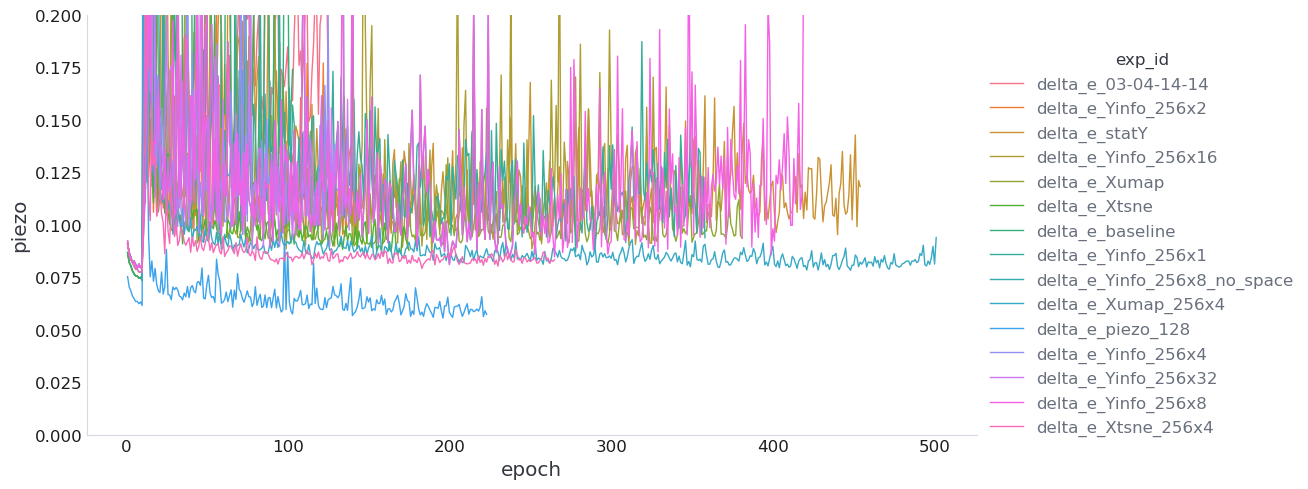

In [ ]:
sns.relplot(res, x='epoch', y='piezo', hue='exp_id', kind='line', aspect=2, height=5, lw=1)
plt.ylim(0, 0.2)

In [ ]:
res.query('not ema').sort_values('infoY_delta_e', ascending=True).groupby('exp_id').first()[['infoY_delta_e', 'epoch', 'adv_data']]

,infoY_delta_e,epoch,adv_data
exp_id,,,
delta_e_03-04-14-14,0.044386,12,Baseline
delta_e_Xtsne,0.041182,12,Xshift_tsne
delta_e_Xtsne_256x4,0.038342,21,Xshift_tsne
delta_e_Xumap,0.037713,15,Xshift_umap
delta_e_Xumap_256x4,0.032853,31,Xshift_umap
delta_e_Yinfo_256x1,0.018155,341,infoY_delta_e
delta_e_Yinfo_256x16,0.009092,306,infoY_delta_e
delta_e_Yinfo_256x2,0.013415,141,infoY_delta_e
delta_e_Yinfo_256x32,0.006963,137,infoY_delta_e


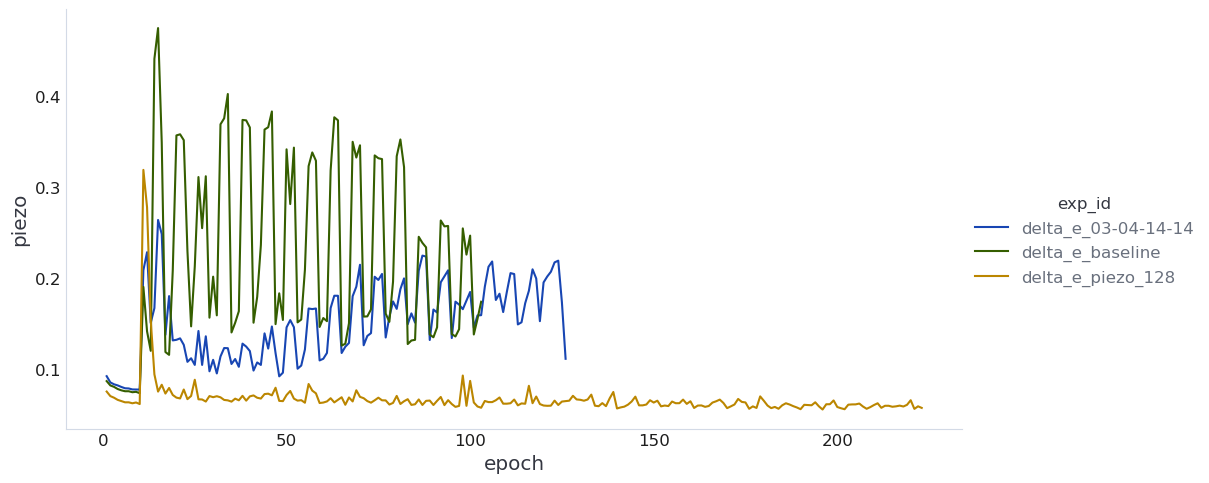

In [ ]:
sns.relplot(res.query('adv_data == "piezo" or adv_data == "Baseline"'), x='epoch', y='piezo', hue='exp_id', kind='line', aspect=2, height=5)

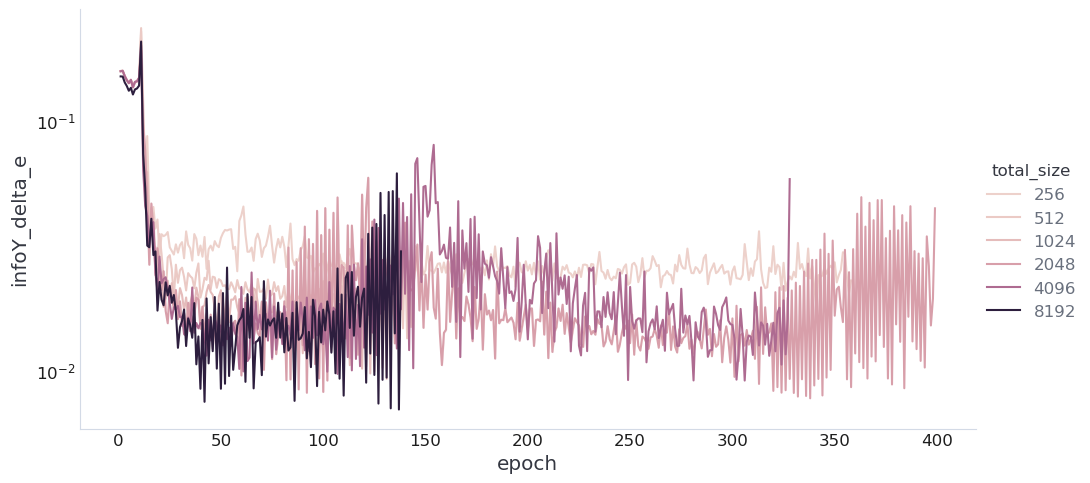

In [ ]:
infoy = res.query('adv_data == "infoY_delta_e" and epoch < 400')
sns.relplot(infoy, x='epoch', y='infoY_delta_e', hue='total_size', kind='line', aspect=2, height=5)
plt.yscale('log')

Change high-bandgap: make clear it's a dataset

Change gradient section

Change validation

bandgap plot

distribution loss

compare both models
